**Data Description:**
The data is related with direct marketing campaigns of a
Portuguese banking institution. The marketing campaigns
were based on phone calls. Often, more than one contact to
the same client was required, in order to access if the product
(bank term deposit) would be ('yes') or not ('no') subscribed.

**Domain:**
Banking

**Context:**
Leveraging customer information is paramount for most
businesses. In the case of a bank, attributes of customers like
the ones mentioned below can be crucial in strategizing a
marketing campaign when launching a new product

### Attribute Information:
    
1. **age** (numeric)

2. **job** : type of job (categorical:
'admin.','blue-collar','entrepreneur','housemaid','manage
ment','retired','self-employed','services','student','technicia
n','unemployed','unknown')
3. **marital** : marital status (categorical:
'divorced','married','single','unknown'; note: 'divorced'
means divorced or widowed)
4. **education** (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','profes
sional.course','university.degree','unknown')
5. **defaul**t: has credit in default? (categorical:
'no','yes','unknown')
6. **balance**: average yearly balance, in euros (numeric)
7. **housing**: has housing loan? (categorical:
'no','yes','unknown')
8. **loan**: has personal loan? (categorical: 'no','yes','unknown')
9. **contact**: contact communication type (categorical:
'cellular','telephone')
10. **day**: last contact day of the month (numeric 1 -31)
11.month: last contact month of year (categorical: 'jan', 'feb',
'mar', ..., 'nov', 'dec')
12. **duration**: last contact duration, in seconds (numeric).
Important note: this attribute highly affects the output
target (e.g., if duration=0 then y='no'). Yet, the duration is
not known before a call is performed. Also, after the end
of the call y is obviously known. Thus, this input should
only be included for benchmark purposes and should be
discarded if the intention is to have a realistic predictive
model.
13. **campaign**: number of contacts performed during this
campaign and for this client (numeric, includes last
contact)
14. **pdays**: number of days that passed by after the client
was last contacted from a previous campaign (numeric;
999 means client was not previously contacted)
15. **previous**: number of contacts performed before this
campaign and for this client (numeric)
16. **poutcome**: outcome of the previous marketing
campaign (categorical: 'failure','nonexistent','success')

17. **target**: has the client subscribed a term deposit? (binary:
"yes","no")


### Learning Outcomes:
 ● Exploratory Data Analysis. <br>
 ● Preparing the data to train a model. <br>
 ● Training and making predictions using an Ensemble Model. <br>
 ● Tuning an Ensemble model.


### Objective:
The classification goal is to predict if the client will subscribe
(yes/no) a term deposit (variable y).

import numpy as np #import numpy
import pandas as pd #import pandas
import seaborn as sns # import seaborn
import matplotlib.pyplot as plt #import pyplot
from scipy.stats import pearsonr #for pearson's correlation

from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler #for various scaling methods
from sklearn.linear_model import LogisticRegression #for LogisticRegression
from sklearn.naive_bayes import GaussianNB #for NaiveBayes
from sklearn.neighbors import KNeighborsClassifier #for KNN
from sklearn.svm import SVC #for Support vector classifier


from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  #for image
from sklearn import tree #for tree
from os import system #using user environment
from sklearn.ensemble import BaggingClassifier #for bagging classifier
from sklearn.ensemble import AdaBoostClassifier #for adaptive boosting
from sklearn.ensemble import GradientBoostingClassifier #for gradient boosting
from sklearn.ensemble import RandomForestClassifier #for random forest
from sklearn.preprocessing import LabelEncoder #for lebel encoder

from sklearn.tree import export_graphviz #for exporting dot data
from sklearn.externals.six import StringIO  #for stringIO
from IPython.display import Image  #for including image
import pydotplus #for dot data
import graphviz #for visualizing decision tree
from statistics import median,mean

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices

# 1. Import the Libraries & Data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV


import os
os.chdir("C:/Users/Abhishek/Desktop/Lets Upgrade Case Studies/Ensemble Techniques")

from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("bank-full.csv")
data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


# 2. EDA

In [4]:
data.shape

(45211, 17)

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.info()

# We will have to investigate and change the Needed String(object) features to Categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<h3>Converting String Features to categorical</h3>

In [7]:
# Converting String Features to categorical

data[['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome', 'Target']] = data[['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome', 'Target']].apply(pd.Categorical)

In [8]:
data.info()

# Data has been converted to Categorical, We will further Encode the needed features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


no     39922
yes     5289
Name: Target, dtype: int64


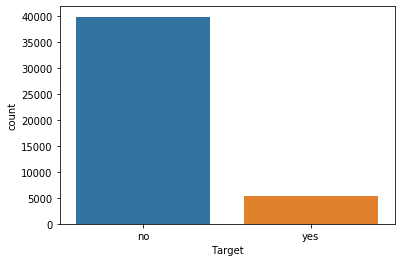

In [9]:
print(data.Target.value_counts())

sns.countplot(data.Target)

#The Data is Highly Imbalanced

<h3>Cheking the Missing values</h3>

In [10]:
data.isna().sum()

# We dont have missing data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

<h3>Cheking the Distribution of Numerical features</h3>

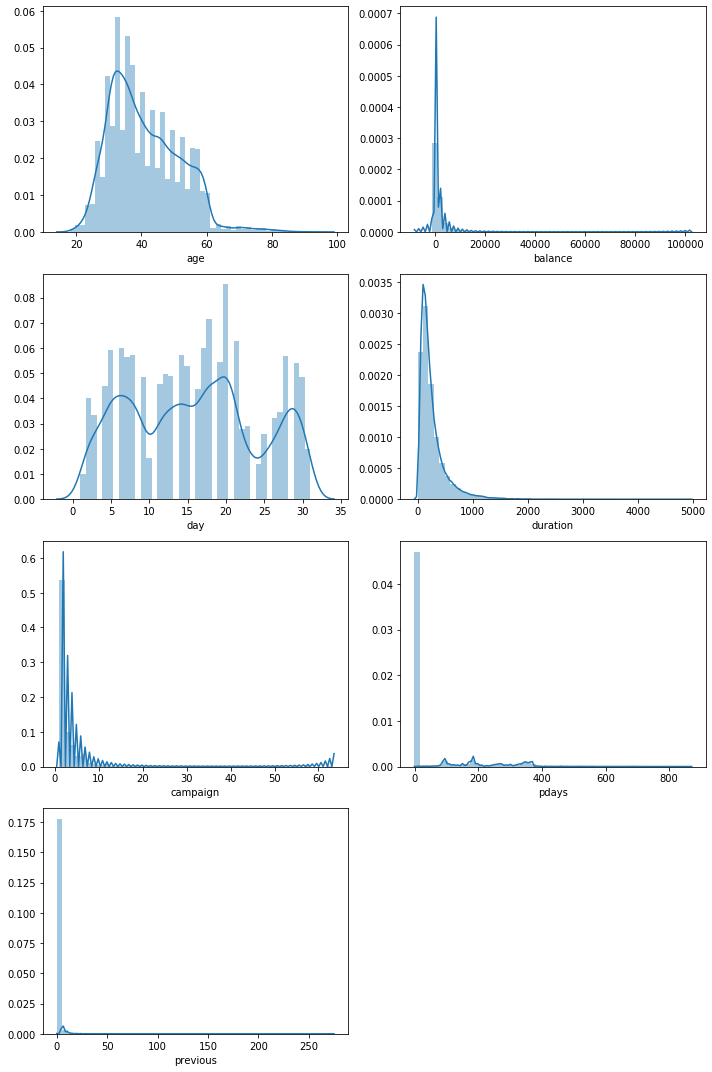

In [12]:
list_num=['age','balance','day','duration', 'campaign','pdays','previous']

fig , axe = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten() # ax here will be of shape [4,2], but to make allocation of subplots easy, we will flatten
for i in range(len(list_num)) :
    sns.distplot(a=data[list_num[i]],ax=axe[i])
    plt.xlabel([list_num[i]])
    fig.tight_layout()
    fig.show()
    axe.flat[-1].set_visible(False)        



#Balance,Duration,campaign,Pdays,Previous are Right skewed. (If all data is to Right it is left skewed)

<h3>Checking the Distribution of Categorical features</h3>

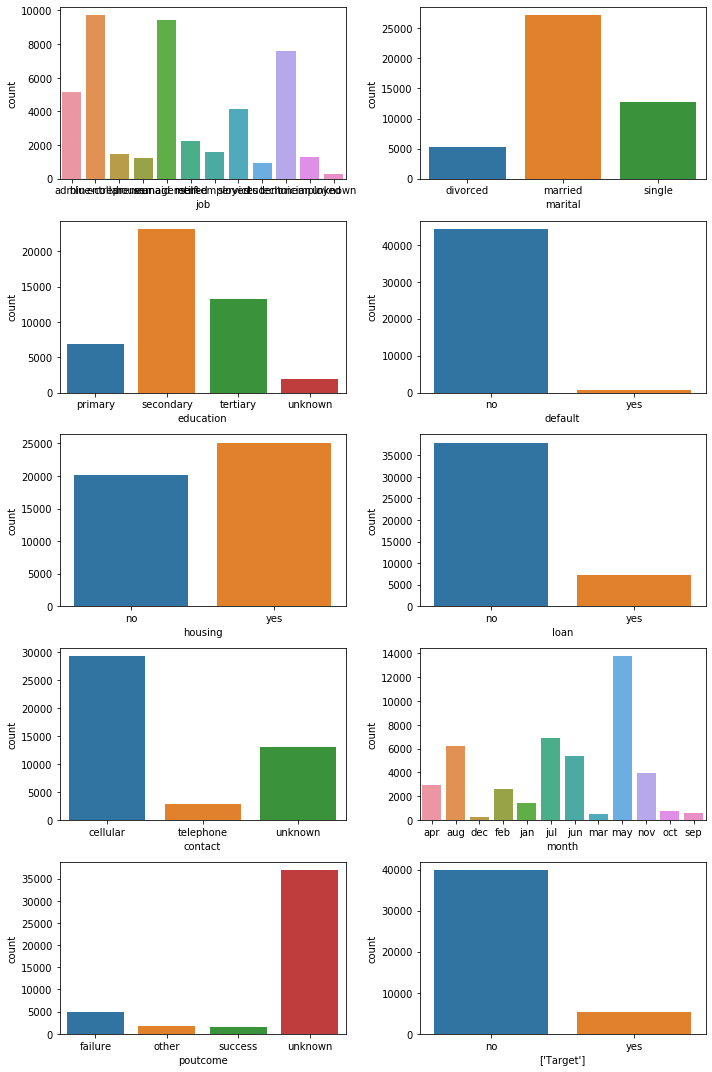

In [13]:
list_num=['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome', 'Target']

fig , axe = plt.subplots(nrows=5,ncols=2,figsize=(10,15))
axe=axe.flatten() # ax here will be of shape [4,2], but to make allocation of subplots easy, we will flatten
for i in range(len(list_num)) :
    sns.countplot(x=data[list_num[i]],data=data,ax=axe[i])
    plt.xlabel([list_num[i]])
    fig.tight_layout()
    fig.show()
            
# The  data is overall unbalanced, not very great from our point of view.
# Inferences :
#1. "Default" : 90% are "no"
#2. "target"  : This is our target variable, and it is Highly unbalanced too.
#3. "Month"   : Most customers contacted in May and leadt in Dec,March.
#4. "Contact" : Most customers contacted by Cellular Network.
#5. "housing" : No. of customers who have housing loan is higher than custs who dont.

### Measure of Skewness of numerical Features.

In [14]:
data.skew().to_frame("Measure of Skewness")

# +ve Values = Right skewness. Bigger number = more skewness in this direction
# -ve Values = Left skewness.

#Here we have Right skewed data only.

,Measure of Skewness
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


### Checking the presence of outliers for our Numerical features.

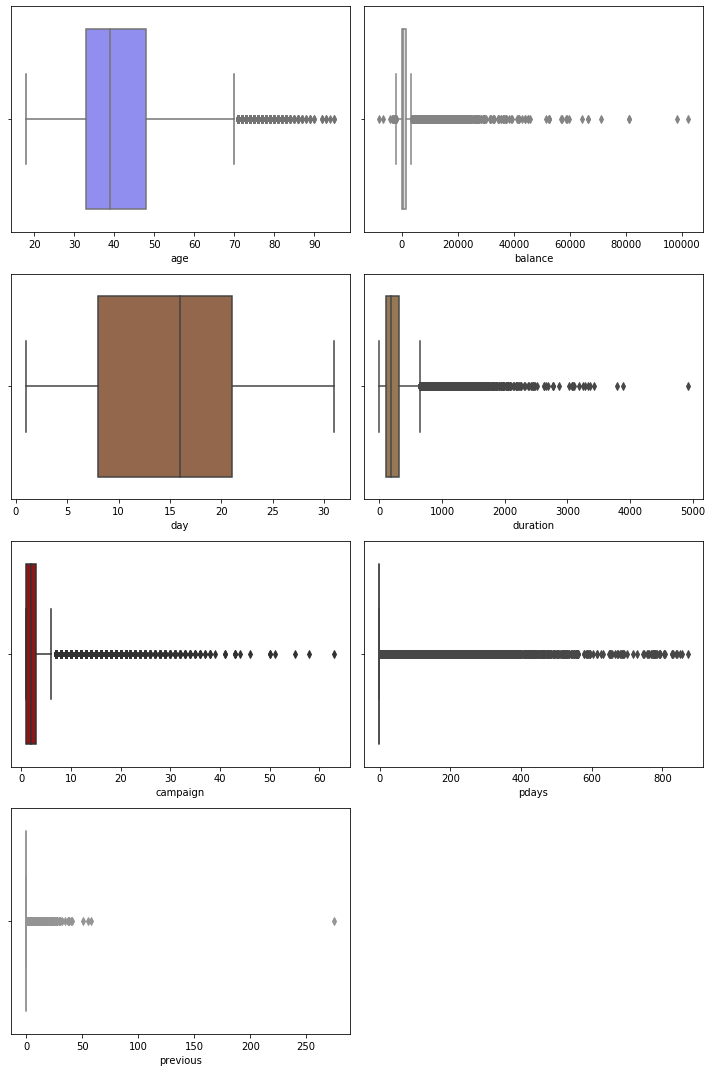

In [15]:
list_num=['age','balance','day','duration', 'campaign','pdays','previous']
pl=["cool", "coolwarm", "copper", "cubehelix","flag","gist_earth","vlag","CMRmap_r","Dark2","inferno_r","jet"]

fig , axe = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten() # ax here will be of shape [4,2], but to make allocation of subplots easy, we will flatten
for i in range(len(list_num)) :
    sns.boxplot(x=data[list_num[i]],data=data,ax=axe[i],palette=pl[i])
    plt.xlabel([list_num[i]])
    fig.tight_layout()
    fig.show()
    axe.flat[-1].set_visible(False)        

# We have outliers in Age,Balance,duration, campaign,pdays,previous

#### Check Just the Distribution of target variable.

In [16]:
data["Target"].value_counts().to_frame(" Distribution of target variable.")

# Unbalanced.

,Distribution of target variable.
no,39922
yes,5289


## Need to do Label Encoding.
### Convert All categorical features to int (So the data is numeric). Then Make this feature categorical again.
## After this our goal i.e to have Numerical Categorical features will be achieved
- from sklearn.preprocessing import LabelEncoder

In [17]:
df= data.copy()
encoder = LabelEncoder()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [19]:
list_num=['marital', 'education', 'default','housing','loan','month','poutcome', 'Target']

for i in range(len(list_num)):
    df[list_num[i]]= encoder.fit_transform(df[list_num[i]])

In [20]:
# Converting Back to categorical
df[['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome', 'Target']] = df[['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome', 'Target']].apply(pd.Categorical)

In [21]:
df.info()
# ALL categorical features are numeric Categorical Now .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [22]:
df.head(5)
# ALL categorical features are numeric Categorical Now .

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


### Handling  the outliers : With Mean replacement.
- **We have outliers in Age,Balance,duration, campaign,pdays,previous.**
- We will ignore Age,

In [23]:
meanBalance = df.balance.mean()
df["balance"] = np.where(df["balance"] > np.percentile(df["balance"],75), meanBalance , df["balance"])
# For all values in "balance" that are > then our 75th percentile, Replace them with Mean of Balance i.e meanBalance

In [24]:
meanduration = df.duration.mean()
df["duration"] = np.where(df["duration"] > np.percentile(df["duration"],75), meanduration , df["duration"])

In [25]:
meancampaign = df.campaign.mean()
df["campaign"] = np.where(df["campaign"] > np.percentile(df["campaign"],75), meancampaign , df["campaign"])

In [26]:
meanpdays = df.pdays.mean()
df["pdays"] = np.where(df["pdays"] > np.percentile(df["pdays"],75), meanpdays , df["pdays"])

In [27]:
meanprevious = df.previous.mean()
df["previous"] = np.where(df["previous"] > np.percentile(df["previous"],75), meanprevious , df["previous"])

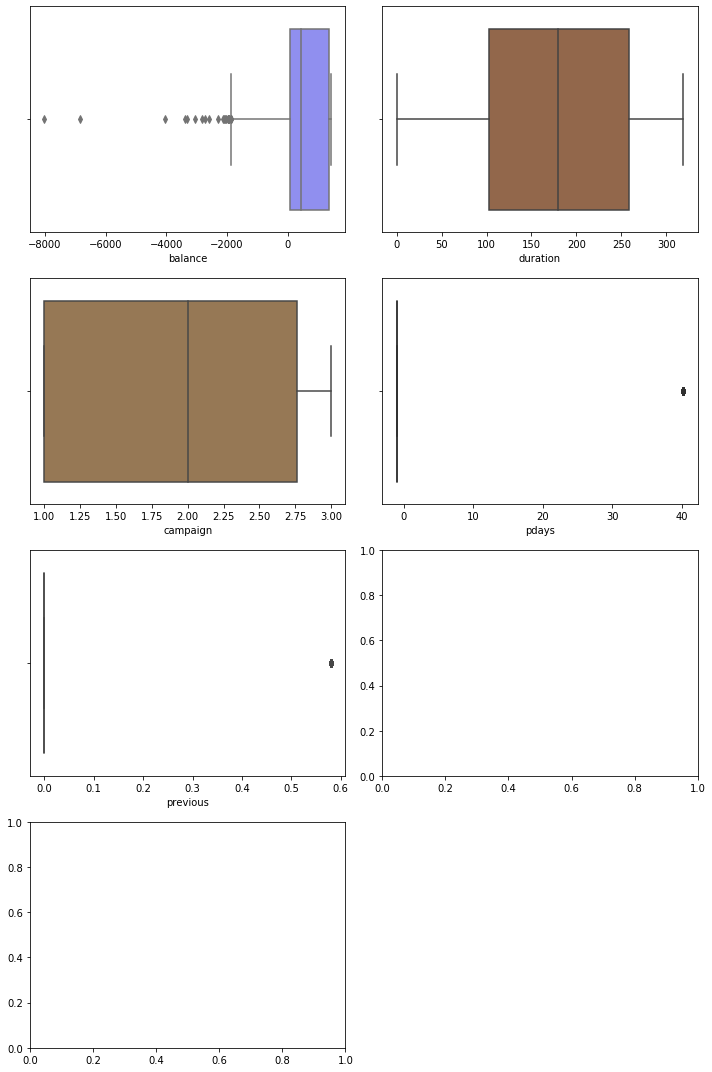

In [28]:
list_num=['balance','duration', 'campaign','pdays','previous']
pl=["cool", "copper", "cubehelix","flag","gist_earth","vlag","CMRmap_r","Dark2","inferno_r","jet""coolwarm"]

fig , axe = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten() # ax here will be of shape [4,2], but to make allocation of subplots easy, we will flatten
for i in range(len(list_num)) :
    sns.boxplot(x=df[list_num[i]],data=df,ax=axe[i],palette=pl[i])
    plt.xlabel([list_num[i]])
    fig.tight_layout()
    fig.show()
    axe.flat[-1].set_visible(False)        


### Lets get the correlation plot after removing Outliers

In [29]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.109252,-0.009120,-0.016518,0.022214,0.000753,0.000753
balance,0.109252,1.000000,0.000260,0.033961,-0.025583,0.075741,0.075741
day,-0.009120,0.000260,1.000000,-0.064636,0.120661,-0.086174,-0.086174
duration,-0.016518,0.033961,-0.064636,1.000000,-0.090286,0.038927,0.038927
campaign,0.022214,-0.025583,0.120661,-0.090286,1.000000,-0.104856,-0.104856
pdays,0.000753,0.075741,-0.086174,0.038927,-0.104856,1.000000,1.000000
previous,0.000753,0.075741,-0.086174,0.038927,-0.104856,1.000000,1.000000


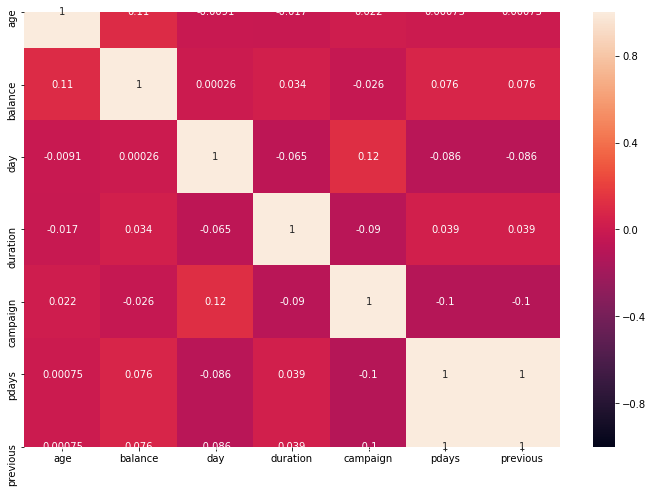

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

In [31]:
df.head(1)

# We will Remove Job,Education,Contact,duration,pdays,days,month

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,1362.272058,1,0,unknown,5,8,261.0,1.0,-1.0,0.0,3,0


In [32]:
# our Dataframe after deleting the features.
df2= df.drop(['job','education','contact','duration','pdays','day', 'month'],axis=1)
df2.head(3)

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0


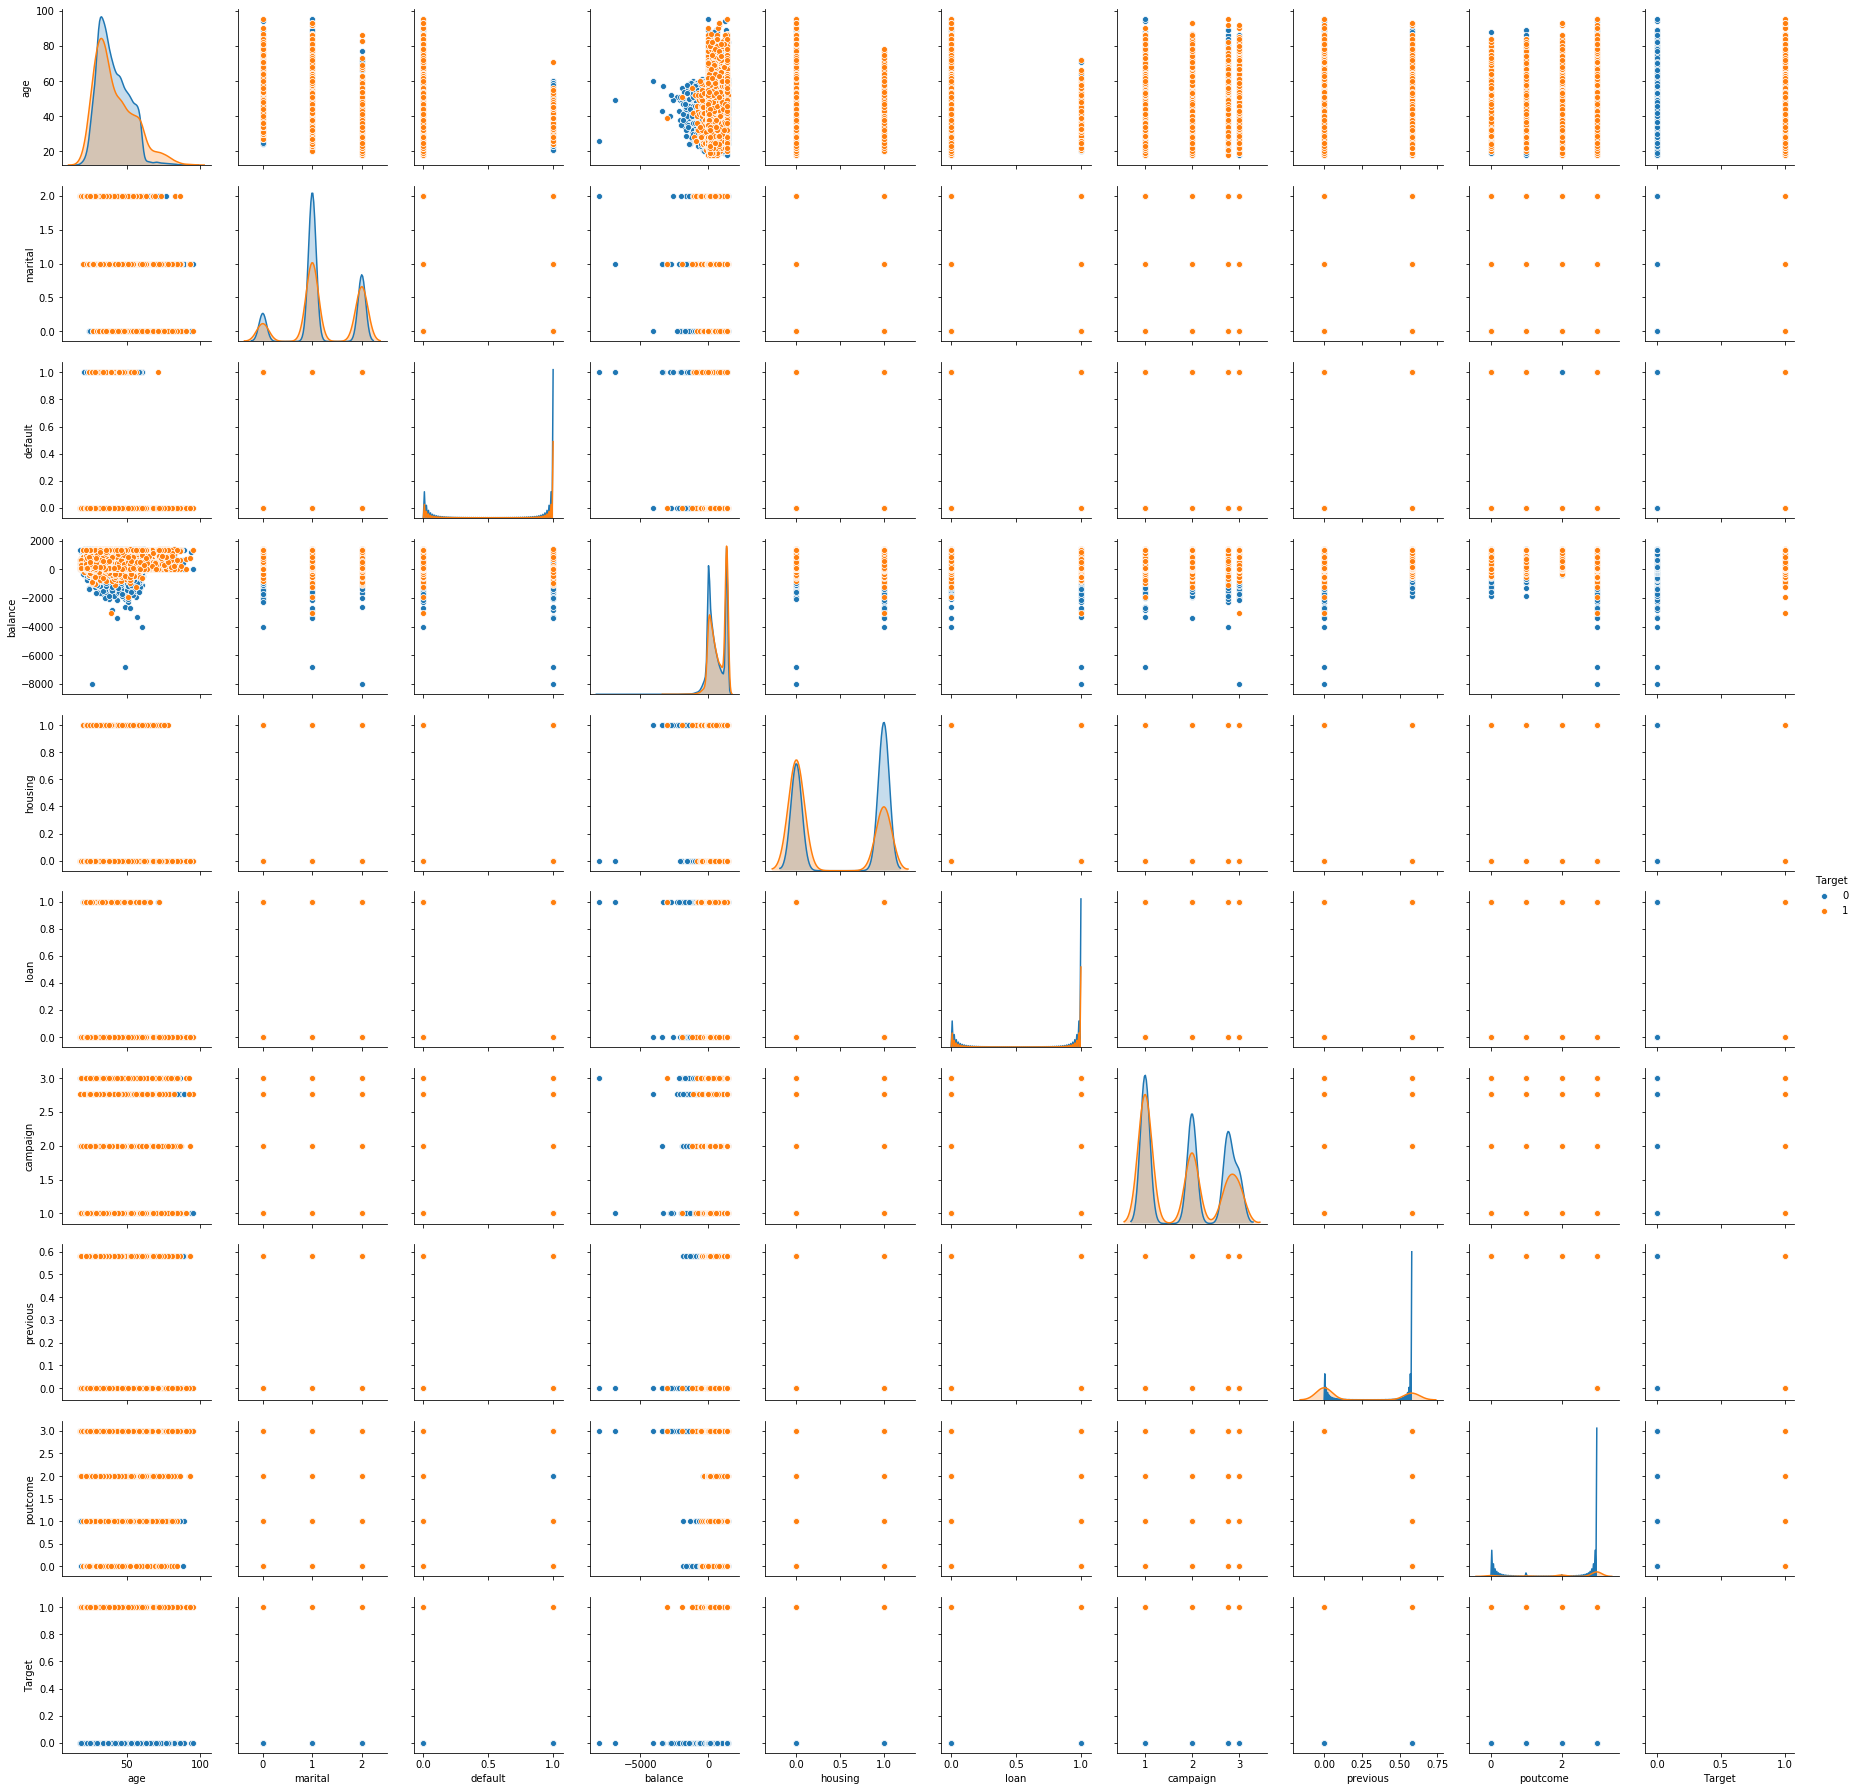

In [33]:
sns.pairplot(df2,hue="Target")

### Split the train and test data

In [34]:
X=df2.drop("Target",axis=1)
y=df2["Target"]
print(X.shape)
print(y.shape)

(45211, 9)
(45211,)


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3 , random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 9)
(13564, 9)
(31647,)
(13564,)


In [36]:
# Scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [37]:
X_train.head(2)

,age,marital,default,balance,housing,loan,campaign,previous,poutcome
10747,36,2,0,0.0,0,0,2.763841,0.0,3
26054,56,1,0,196.0,0,0,3.000000,0.0,3


# Model Building

## 1.Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,log_loss
LR = LogisticRegression(solver="liblinear")
LR.fit(X_train_scaled,y_train)

y_pred= LR.predict(X_test_scaled)
LR_accuracy = accuracy_score(y_test,y_pred)

print("\n Confusion metrics : \n", confusion_matrix(y_test,y_pred))
print("\n Accuracy score :",LR_accuracy)
print("\n Classification Report : \n",classification_report(y_test,y_pred))


 Confusion metrics : 
 [[11845   121]
 [ 1339   259]]

 Accuracy score : 0.8923621350634031

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.68      0.16      0.26      1598

    accuracy                           0.89     13564
   macro avg       0.79      0.58      0.60     13564
weighted avg       0.87      0.89      0.86     13564



### Logistic Regresion, But using SGD

For values of alpha =  1e-05 The log loss is: 0.32378614634199365
For values of alpha =  0.0001 The log loss is: 0.32181688396954866
For values of alpha =  0.001 The log loss is: 0.3215068385094125
For values of alpha =  0.01 The log loss is: 0.3241109456275556
For values of alpha =  0.1 The log loss is: 0.33290941893500964
For values of alpha =  1 The log loss is: 0.33784923674106293
For values of alpha =  10 The log loss is: 0.3389756013569473


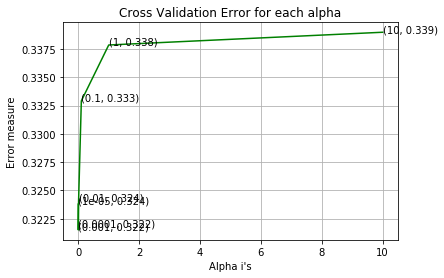

For values of best alpha =  0.001 The train log loss is: 0.31923785774459357
For values of best alpha =  0.001 The test log loss is: 0.3215068385094125
Total number of data points : 13564

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.70      0.16      0.26      1598

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564


 Accuracy score : 0.8928044824535535


In [39]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss,confusion_matrix
SGD = SGDClassifier(loss='log',)


alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
log_error_array=[]

for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_scaled, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_scaled, y_train)
    predict_y = sig_clf.predict_proba(X_test_scaled)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_scaled, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_scaled, y_train)

predict_y = sig_clf.predict_proba(X_train_scaled)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_scaled)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))

print("\n Classification Report : \n",classification_report(y_test,predicted_y))
print("\n Accuracy score :",accuracy_score(y_test,predicted_y))

LR_accuracy = accuracy_score(y_test,predicted_y)

---

### Naive bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

NB.fit(X_train_scaled,y_train)

y_pred= NB.predict(X_test_scaled)
NB_accuracy = accuracy_score(y_test,y_pred)

print("\n Confusion metrics : \n", confusion_matrix(y_test,y_pred))
print("\n Accuracy score :",NB_accuracy)
print("\n Classification Report : \n",classification_report(y_test,y_pred))


 Confusion metrics : 
 [[10654  1312]
 [ 1112   486]]

 Accuracy score : 0.8212916543792391

 Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11966
           1       0.27      0.30      0.29      1598

    accuracy                           0.82     13564
   macro avg       0.59      0.60      0.59     13564
weighted avg       0.83      0.82      0.83     13564



## KNN Model

For values of K =  3 The log loss is: 0.33733880138033867
For values of K =  5 The log loss is: 0.33100077295895647
For values of K =  7 The log loss is: 0.3272341660121987
For values of K =  10 The log loss is: 0.32409523465467055
For values of K =  25 The log loss is: 0.32104326089135105
For values of K =  50 The log loss is: 0.31927292636336463
For values of K =  75 The log loss is: 0.3187246692086423
For values of K =  100 The log loss is: 0.31850161584121767
For values of K =  200 The log loss is: 0.318453573337408


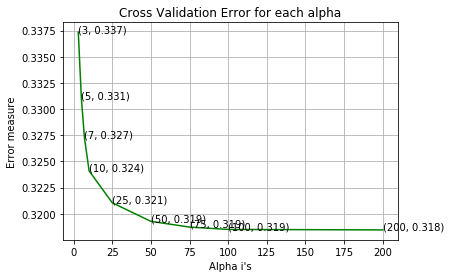

For values of best K =  200 The train log loss is: 0.31438974126124225
For values of best K =  200 The test log loss is: 0.318453573337408
Total number of data points : 13564

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.64      0.16      0.25      1598

    accuracy                           0.89     13564
   macro avg       0.77      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564


 confusion matrix : 
 [[11825   141]
 [ 1344   254]]

 Accuracy score : 0.8905190209377765


In [41]:
from sklearn.neighbors import KNeighborsClassifier

alpha = [3,5,7,10,25,50,75,100,200] # hyperparam for SGD classifier.
log_error_array=[]

for i in alpha:
    clf = KNeighborsClassifier(n_neighbors =i)
    clf.fit(X_train_scaled, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_scaled, y_train)
    predict_y = sig_clf.predict_proba(X_test_scaled)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of K = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = KNeighborsClassifier(n_neighbors =alpha[best_alpha])
clf.fit(X_train_scaled, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_scaled, y_train)

predict_y = sig_clf.predict_proba(X_train_scaled)
print('For values of best K = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_scaled)
print('For values of best K = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))

print("\n Classification Report : \n",classification_report(y_test,predicted_y))
print("\n confusion matrix : \n",confusion_matrix(y_test,predicted_y))
print("\n Accuracy score :",accuracy_score(y_test,predicted_y))

KNN_accuracy = accuracy_score(y_test,predicted_y)

### SVC Model

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = [{"C":[10**-4,10**-3, 10**-2, 10**0, 10**2]}]
GSCV= GridSearchCV(SVC(),parameters,return_train_score=True,cv=5)

GSCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 1, 100]}],
             return_train_score=True)

In [43]:
results=pd.DataFrame(GSCV.cv_results_)
results = results.sort_values(['mean_test_score'],ascending=False)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.208201,0.171456,0.885861,0.011383,0.0001,{'C': 0.0001},0.883412,0.883254,0.883394,0.883394,...,0.883370,0.000058,1,0.883359,0.883399,0.883364,0.883364,0.883364,0.883370,0.000015
1,5.705800,0.466218,0.997436,0.079754,0.001,{'C': 0.001},0.883412,0.883254,0.883394,0.883394,...,0.883370,0.000058,1,0.883359,0.883399,0.883364,0.883364,0.883364,0.883370,0.000015
2,5.239988,0.321839,0.908607,0.057236,0.01,{'C': 0.01},0.883412,0.883254,0.883394,0.883394,...,0.883370,0.000058,1,0.883359,0.883399,0.883364,0.883364,0.883364,0.883370,0.000015
3,5.675004,0.084475,0.918014,0.013939,1,{'C': 1},0.883412,0.883254,0.883394,0.883394,...,0.883370,0.000058,1,0.883359,0.883399,0.883364,0.883364,0.883364,0.883370,0.000015
4,40.076029,6.080238,1.036431,0.155129,100,{'C': 100},0.883412,0.883096,0.883394,0.883394,...,0.883338,0.000121,5,0.883399,0.883438,0.883364,0.883403,0.883403,0.883401,0.000024


In [44]:
print(GSCV.best_estimator_)
print(GSCV.score(X_test, y_test))
print(GSCV.best_params_)
best_fit=GSCV.best_params_["C"]
print(best_fit)

SVC(C=0.0001)
0.8821881450899439
{'C': 0.0001}
0.0001


In [45]:
svm_model = SVC(C=best_fit)

svm_model.fit(X_train,y_train)

# get support vectors
print(svm_model.support_vectors_)

# get indices of support vectors
print(svm_model.support_)

# get number of support vectors for each class
print(svm_model.n_support_)


[[41.          0.          0.         ...  1.          0.58032337
   2.        ]
 [61.          1.          0.         ...  2.          0.58032337
   2.        ]
 [29.          2.          0.         ...  1.          0.58032337
   1.        ]
 ...
 [25.          2.          0.         ...  2.          0.58032337
   0.        ]
 [35.          1.          0.         ...  2.          0.
   3.        ]
 [44.          2.          0.         ...  1.          0.
   3.        ]]
[    3     7    20 ... 31609 31636 31642]
[3691 3691]


In [46]:
y_pred = svm_model.predict(X_test)
SVC_accuracy = accuracy_score(y_test,y_pred)

In [47]:
0.8821881450899439

0.8821881450899439

## Poly SVM

In [48]:
svm_Poly_model = SVC(C=best_fit,kernel='poly')

svm_Poly_model.fit(X_train,y_train)

y_Poly_pred = svm_Poly_model.predict(X_test)
accuracy_score(y_test,y_Poly_pred)

0.8821881450899439

---

# Ensemble Models.

## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = [{"max_depth":[3,5,10,15,25,50,75] , "max_leaf_nodes":[3,5,10,15,25,50,75]}]

GridSearchDT = GridSearchCV(DecisionTreeClassifier(random_state=42),params,cv=5)

GridSearchDT.fit(X_train_scaled,y_train)

results=pd.DataFrame(GridSearchDT.cv_results_)
results = results.sort_values(['mean_test_score'],ascending=False)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,0.048705,0.009429,0.002203,0.000400,15,15,"{'max_depth': 15, 'max_leaf_nodes': 15}",0.895419,0.895261,0.891452,0.892874,0.890504,0.893102,0.001977,1
17,0.041521,0.002488,0.002202,0.000400,10,15,"{'max_depth': 10, 'max_leaf_nodes': 15}",0.895419,0.895261,0.891452,0.892874,0.890504,0.893102,0.001977,1
31,0.041106,0.003477,0.001804,0.000748,25,15,"{'max_depth': 25, 'max_leaf_nodes': 15}",0.895419,0.895261,0.891452,0.892874,0.890504,0.893102,0.001977,1
45,0.029808,0.002226,0.001602,0.000492,75,15,"{'max_depth': 75, 'max_leaf_nodes': 15}",0.895419,0.895261,0.891452,0.892874,0.890504,0.893102,0.001977,1
38,0.029857,0.001245,0.002179,0.000724,50,15,"{'max_depth': 50, 'max_leaf_nodes': 15}",0.895419,0.895261,0.891452,0.892874,0.890504,0.893102,0.001977,1
22,0.026891,0.001526,0.001608,0.000496,15,5,"{'max_depth': 15, 'max_leaf_nodes': 5}",0.894787,0.895577,0.891452,0.892874,0.890504,0.893039,0.001922,6
37,0.029696,0.001446,0.001629,0.000476,50,10,"{'max_depth': 50, 'max_leaf_nodes': 10}",0.894787,0.895577,0.891452,0.892874,0.890504,0.893039,0.001922,6
8,0.036202,0.007521,0.002400,0.000490,5,5,"{'max_depth': 5, 'max_leaf_nodes': 5}",0.894787,0.895577,0.891452,0.892874,0.890504,0.893039,0.001922,6
9,0.071998,0.012664,0.005607,0.002577,5,10,"{'max_depth': 5, 'max_leaf_nodes': 10}",0.894787,0.895577,0.891452,0.892874,0.890504,0.893039,0.001922,6
36,0.023605,0.002944,0.001600,0.000500,50,5,"{'max_depth': 50, 'max_leaf_nodes': 5}",0.894787,0.895577,0.891452,0.892874,0.890504,0.893039,0.001922,6


In [50]:
# Find the Best Parameters.

print(GridSearchDT.best_estimator_)
print(GridSearchDT.score(X_test, y_test))
print(GridSearchDT.best_params_)
best_fit_max_depth=GridSearchDT.best_params_["max_depth"]
best_fit_max_leaf_nodes=GridSearchDT.best_params_["max_leaf_nodes"]
print(best_fit_max_depth)
print(best_fit_max_leaf_nodes)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=15, random_state=42)
0.8821881450899439
{'max_depth': 10, 'max_leaf_nodes': 15}
10
15


In [51]:
clf = DecisionTreeClassifier(max_depth=best_fit_max_depth ,max_leaf_nodes= best_fit_max_leaf_nodes,random_state=42)

clf.fit(X_train_scaled, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_scaled, y_train)

predict_y = sig_clf.predict_proba(X_train_scaled)
print('For values of best max_depth ,max_leaf_nodes  = ', best_fit_max_depth,best_fit_max_leaf_nodes, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_scaled)
print('For values of best max_depth ,max_leaf_nodes  = ',best_fit_max_depth,best_fit_max_leaf_nodes, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))

print("\n Classification Report : \n",classification_report(y_test,predicted_y))
print("\n confusion matrix : \n",confusion_matrix(y_test,predicted_y))
print("\n Accuracy score :",accuracy_score(y_test,predicted_y))

DT_accuracy = accuracy_score(y_test,predicted_y)

For values of best max_depth ,max_leaf_nodes  =  10 15 The train log loss is: 0.3128090422518156
For values of best max_depth ,max_leaf_nodes  =  10 15 The test log loss is: 0.318589826473538
Total number of data points : 13564

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.64      0.19      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.86     13564


 confusion matrix : 
 [[11801   165]
 [ 1299   299]]

 Accuracy score : 0.8920672368033029


In [52]:
from sklearn.metrics import log_loss,confusion_matrix,classification_report,accuracy_score

### Feature importance test for decision tree


In [53]:
feature_cols = X.columns
featureImportance = clf.tree_.compute_feature_importances(normalize=False)
featureImportance_dict = dict(zip(feature_cols, clf.feature_importances_)) 
print(featureImportance_dict)

feat_imp = pd.DataFrame.from_dict(featureImportance_dict, orient='index') #conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) #sort in descending order
feat_imp.rename(columns={0:"Percentage"},inplace=True)
feat_imp

{'age': 0.15781858418582617, 'marital': 0.005193673893146596, 'default': 0.0, 'balance': 0.03137310983945666, 'housing': 0.10797732737253236, 'loan': 0.013209783140887124, 'campaign': 0.009596175551250778, 'previous': 0.20013865029585826, 'poutcome': 0.47469269572104217}


,Percentage
age,0.157819
marital,0.005194
default,0.000000
balance,0.031373
housing,0.107977
loan,0.013210
campaign,0.009596
previous,0.200139
poutcome,0.474693


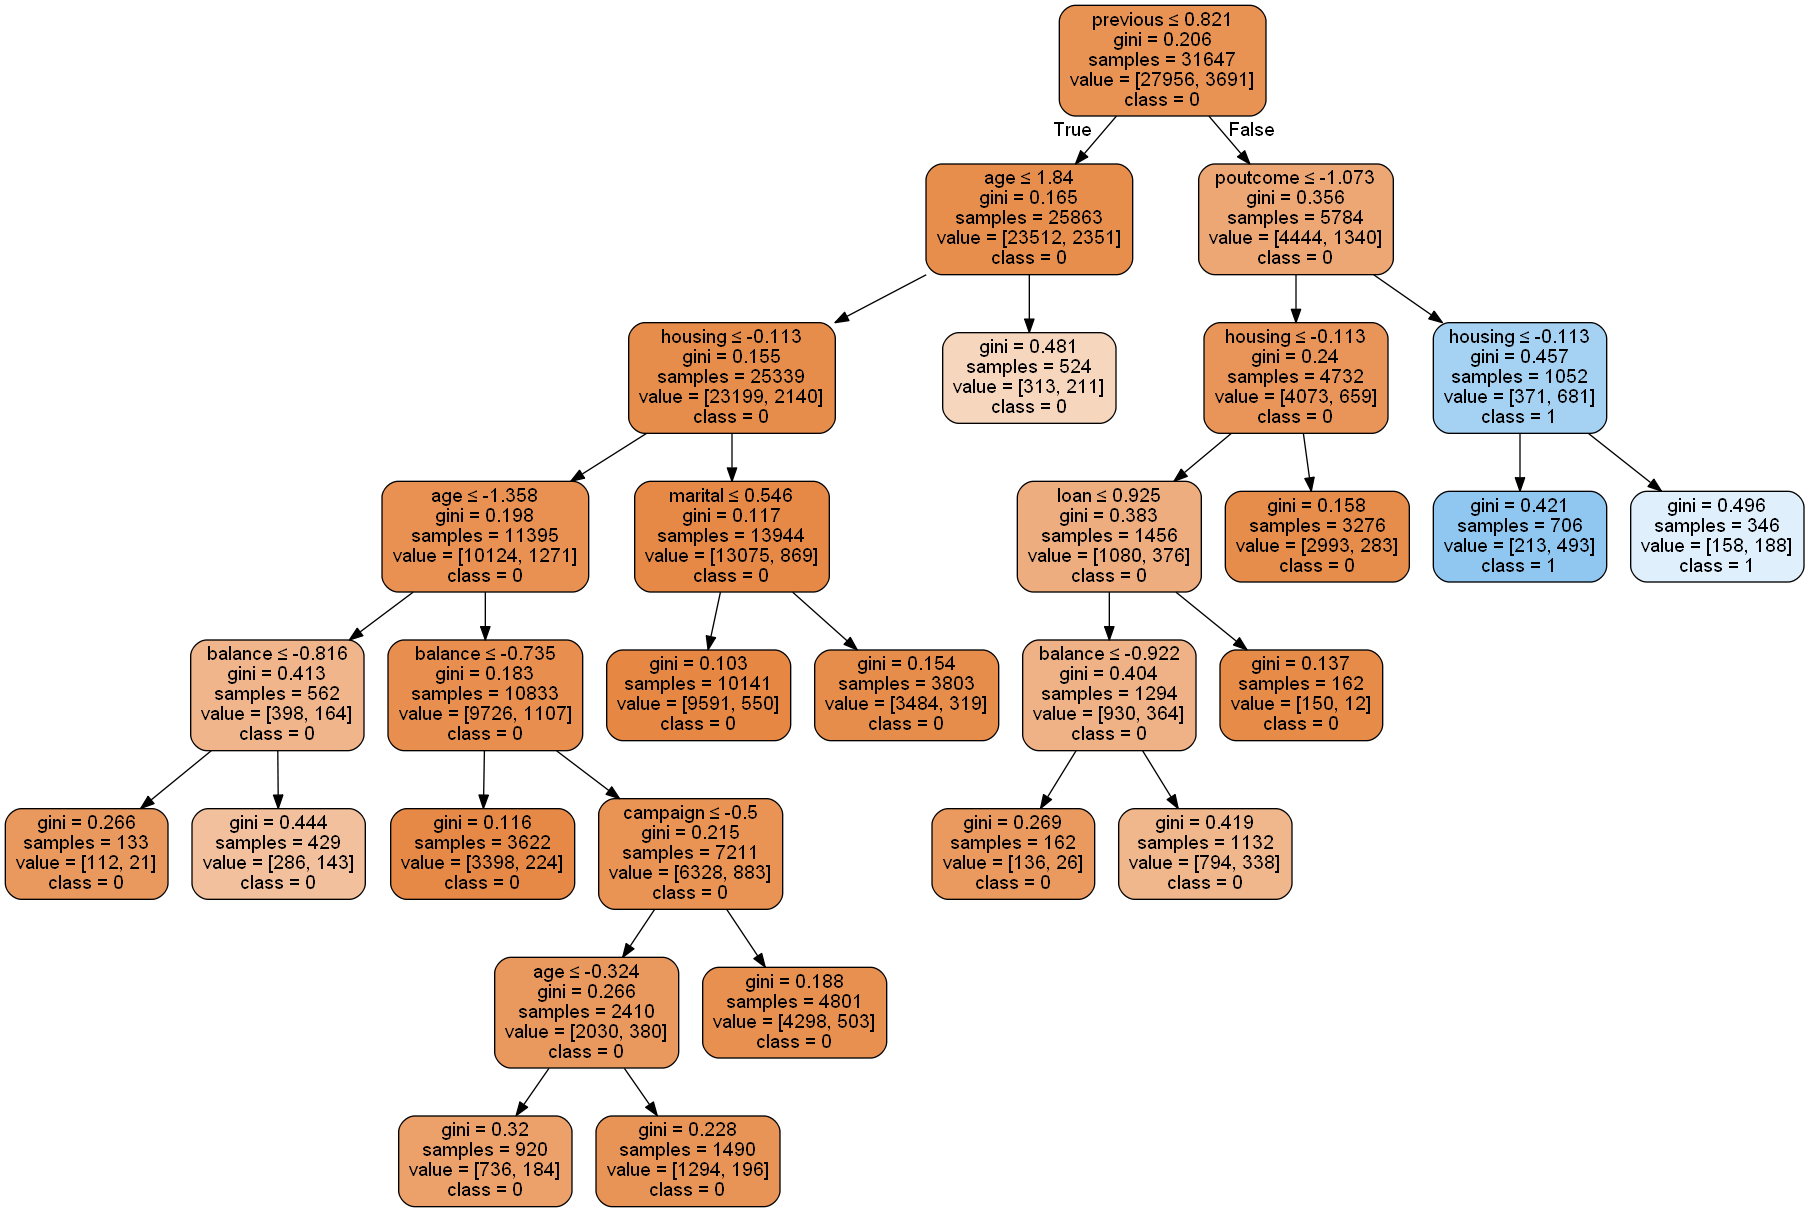

In [54]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  #for stringIO
from six import StringIO
from IPython.display import Image  #for including image
import pydotplus #for dot data
import graphviz #for visualizing decision tree

dot_data = StringIO() #string IO object
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1']) #export graph data to dot format
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) #create graph from dot data
graph.write_png('DT.png')#create png
Image(graph.create_png())#display image

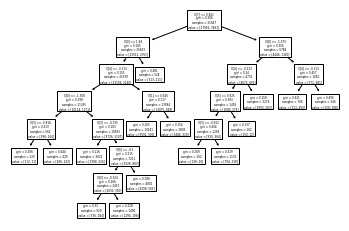

In [55]:
from sklearn import tree
tree.plot_tree(clf);

# Bagging Ensemble Model. 

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

DT = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=15)
params = [{"n_estimators":[5,10,15,20,50,100]}]

GridSearchBagging = GridSearchCV(BaggingClassifier(base_estimator=DT),params,cv=5)

GridSearchBagging.fit(X_train_scaled,y_train)

results=pd.DataFrame(GridSearchBagging.cv_results_)
results = results.sort_values(['mean_test_score'],ascending=False)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.322600,0.003019,0.014621,0.001492,15,{'n_estimators': 15},0.895419,0.895893,0.891452,0.892716,0.890504,0.893197,0.002132,1
4,1.124613,0.066819,0.042782,0.003658,50,{'n_estimators': 50},0.895261,0.895577,0.891452,0.892874,0.890346,0.893102,0.002057,2
1,0.218793,0.004960,0.008822,0.000738,10,{'n_estimators': 10},0.895577,0.895419,0.891452,0.892400,0.890346,0.893039,0.002111,3
0,0.135006,0.035095,0.005403,0.000489,5,{'n_estimators': 5},0.893997,0.896051,0.891294,0.892874,0.890820,0.893007,0.001896,4
3,0.485409,0.071392,0.017613,0.001343,20,{'n_estimators': 20},0.894629,0.895419,0.891136,0.892716,0.890504,0.892881,0.001909,5
5,2.595895,0.428551,0.123995,0.060209,100,{'n_estimators': 100},0.894471,0.895261,0.891136,0.892874,0.890504,0.892849,0.001837,6


In [57]:
# Find the Best Parameters.

print(GridSearchBagging.best_estimator_)
print(GridSearchBagging.score(X_test, y_test))
print(GridSearchBagging.best_params_)
best_fit_n_estimators=GridSearchBagging.best_params_["n_estimators"]
print(best_fit_max_depth)
print(best_fit_max_leaf_nodes)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        max_leaf_nodes=15),
                  n_estimators=15)
0.8821881450899439
{'n_estimators': 15}
10
15


In [58]:
clf = BaggingClassifier(base_estimator=DT,n_estimators=best_fit_n_estimators,random_state=42)

clf.fit(X_train_scaled, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_scaled, y_train)

predict_y = sig_clf.predict_proba(X_train_scaled)
print('For values of best max_depth ,max_leaf_nodes  = ', best_fit_max_depth,best_fit_max_leaf_nodes, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_scaled)
print('For values of best max_depth ,max_leaf_nodes  = ',best_fit_max_depth,best_fit_max_leaf_nodes, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))

print("\n Classification Report : \n",classification_report(y_test,predicted_y))
print("\n confusion matrix : \n",confusion_matrix(y_test,predicted_y))
print("\n Accuracy score :",accuracy_score(y_test,predicted_y))

BAG_accuracy = accuracy_score(y_test,predicted_y)

For values of best max_depth ,max_leaf_nodes  =  10 15 The train log loss is: 0.31220092210217143
For values of best max_depth ,max_leaf_nodes  =  10 15 The test log loss is: 0.3182760436346404
Total number of data points : 13564

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.64      0.19      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.86     13564


 confusion matrix : 
 [[11801   165]
 [ 1299   299]]

 Accuracy score : 0.8920672368033029


# Adaptive Boosting

In [59]:
from sklearn.ensemble import AdaBoostClassifier 



clf = AdaBoostClassifier(n_estimators=best_fit_n_estimators,random_state=42)

clf.fit(X_train_scaled, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_scaled, y_train)

predict_y = sig_clf.predict_proba(X_train_scaled)
print("The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_scaled)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))

print("\n Classification Report : \n",classification_report(y_test,predicted_y))
print("\n confusion matrix : \n",confusion_matrix(y_test,predicted_y))
print("\n Accuracy score :",accuracy_score(y_test,predicted_y))

ADA_accuracy = accuracy_score(y_test,predicted_y)

The train log loss is: 0.3130588834793996
The test log loss is: 0.3185597037065358
Total number of data points : 13564

 Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     11966
           1       0.67      0.13      0.21      1598

    accuracy                           0.89     13564
   macro avg       0.78      0.56      0.58     13564
weighted avg       0.87      0.89      0.86     13564


 confusion matrix : 
 [[11864   102]
 [ 1394   204]]

 Accuracy score : 0.8897080507225007


# Gradient boosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier 

clf = GradientBoostingClassifier(n_estimators=best_fit_n_estimators,random_state=42)

clf.fit(X_train_scaled, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_scaled, y_train)

predict_y = sig_clf.predict_proba(X_train_scaled)
print("The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_scaled)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))

print("\n Classification Report : \n",classification_report(y_test,predicted_y))
print("\n confusion matrix : \n",confusion_matrix(y_test,predicted_y))
print("\n Accuracy score :",accuracy_score(y_test,predicted_y))

GRAD_accuracy = accuracy_score(y_test,predicted_y)

The train log loss is: 0.3117693187338679
The test log loss is: 0.31851014004255124
Total number of data points : 13564

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.65      0.19      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.86     13564


 confusion matrix : 
 [[11802   164]
 [ 1300   298]]

 Accuracy score : 0.8920672368033029


# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

params = [{"max_depth":[3,5,10,15,25,50,75] , "n_estimators":[10,50,75,100,150]}]

GridSearchRF = GridSearchCV(RandomForestClassifier(),params,cv=5)

GridSearchRF.fit(X_train_scaled,y_train)

results=pd.DataFrame(GridSearchRF.cv_results_)
results = results.sort_values(['mean_test_score'],ascending=False)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.956205,0.010771,0.056003,0.001265,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.892891,0.894945,0.892242,0.891926,0.890346,0.892470,0.001494,1
6,0.507607,0.045246,0.034595,0.008690,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.892575,0.895577,0.891768,0.891926,0.890188,0.892407,0.001769,2
11,0.771406,0.079768,0.047594,0.005244,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.893997,0.895261,0.890820,0.891610,0.889240,0.892186,0.002173,3
9,1.452802,0.058305,0.089599,0.006421,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.892733,0.894787,0.891452,0.891136,0.890346,0.892091,0.001552,4
7,0.764411,0.060678,0.045390,0.003776,5,75,"{'max_depth': 5, 'n_estimators': 75}",0.892575,0.894629,0.891452,0.891610,0.889872,0.892028,0.001563,5
14,2.710020,0.109559,0.177986,0.025072,10,150,"{'max_depth': 10, 'n_estimators': 150}",0.895103,0.893997,0.890978,0.891294,0.888766,0.892028,0.002263,6
5,0.102607,0.004899,0.006991,0.000633,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.893049,0.894787,0.890978,0.890978,0.890188,0.891996,0.001687,7
13,1.995096,0.543826,0.111411,0.017776,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.895735,0.893681,0.890662,0.890820,0.888608,0.891901,0.002506,8
12,1.107408,0.020125,0.067202,0.001163,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.895261,0.893365,0.890820,0.890978,0.888608,0.891806,0.002291,9
10,0.147407,0.003010,0.010200,0.000403,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.892733,0.892733,0.888450,0.889872,0.887502,0.890258,0.002157,10


In [62]:
# Find the Best Parameters.

print(GridSearchRF.best_estimator_)
print(GridSearchRF.score(X_test, y_test))
print(GridSearchRF.best_params_)
best_fit_max_depth=GridSearchRF.best_params_["max_depth"]
best_fit_n_estimators=GridSearchRF.best_params_["n_estimators"]
print(best_fit_max_depth)
print(best_fit_n_estimators)

RandomForestClassifier(max_depth=5)
0.8146564435269832
{'max_depth': 5, 'n_estimators': 100}
5
100


In [63]:
clf = RandomForestClassifier(n_estimators=best_fit_n_estimators,max_depth=best_fit_max_depth,random_state=42)

clf.fit(X_train_scaled, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_scaled, y_train)

predict_y = sig_clf.predict_proba(X_train_scaled)
print('For values of best max_depth ,max_leaf_nodes  = ', best_fit_max_depth,best_fit_max_leaf_nodes, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_scaled)
print('For values of best max_depth ,max_leaf_nodes  = ',best_fit_max_depth,best_fit_max_leaf_nodes, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))

print("\n Classification Report : \n",classification_report(y_test,predicted_y))
print("\n confusion matrix : \n",confusion_matrix(y_test,predicted_y))
print("\n Accuracy score :",accuracy_score(y_test,predicted_y))

RAN_accuracy = accuracy_score(y_test,predicted_y)

For values of best max_depth ,max_leaf_nodes  =  5 15 The train log loss is: 0.31086036068459155
For values of best max_depth ,max_leaf_nodes  =  5 15 The test log loss is: 0.31886715152653944
Total number of data points : 13564

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.66      0.18      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.78      0.59      0.61     13564
weighted avg       0.87      0.89      0.86     13564


 confusion matrix : 
 [[11813   153]
 [ 1305   293]]

 Accuracy score : 0.8925095841934533


# Accuracy scores of All Models.

In [64]:
Scores = [('Naive bayes', NB_accuracy),
      ('KNN', KNN_accuracy),
      ('Logistic Regression', LR_accuracy),
      ('SVC', SVC_accuracy ),
      ('Decision Tree',DT_accuracy),
      ('Bagging',BAG_accuracy),
      ('Adaptive Boosting',ADA_accuracy),
      ('Gradient Boosting',GRAD_accuracy),
      ('Random Forest N=100',RAN_accuracy)] #List of accuracy scores of all models

Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score']) #Conversion of list to dataframe

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False) #Sort values in descending manner

Current Scores with Outliers replaced with mean:


,Model,Accuracy score
2,Logistic Regression,0.892804
8,Random Forest N=100,0.892510
4,Decision Tree,0.892067
5,Bagging,0.892067
7,Gradient Boosting,0.892067
1,KNN,0.890519
6,Adaptive Boosting,0.889708
3,SVC,0.882188
0,Naive bayes,0.821292


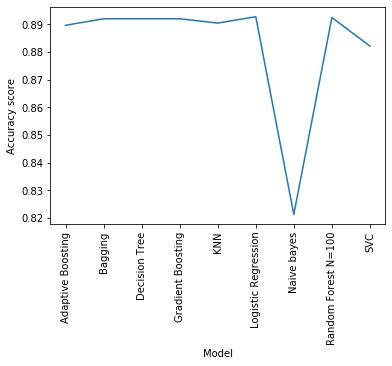

In [65]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=90)
plt.show()